<a href="https://colab.research.google.com/github/tcmarino8/Cyplan-88/blob/main/MARINO_TYLER_HW1_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd
%matplotlib inline


## Reading the network

#Degree list
degs0 =

## Sample Plots (using plot and bar)

In [15]:
n0, bins0 = np.histogram(degs0, bins = list(range(min(degs0), max(degs0) + 1, 1)))

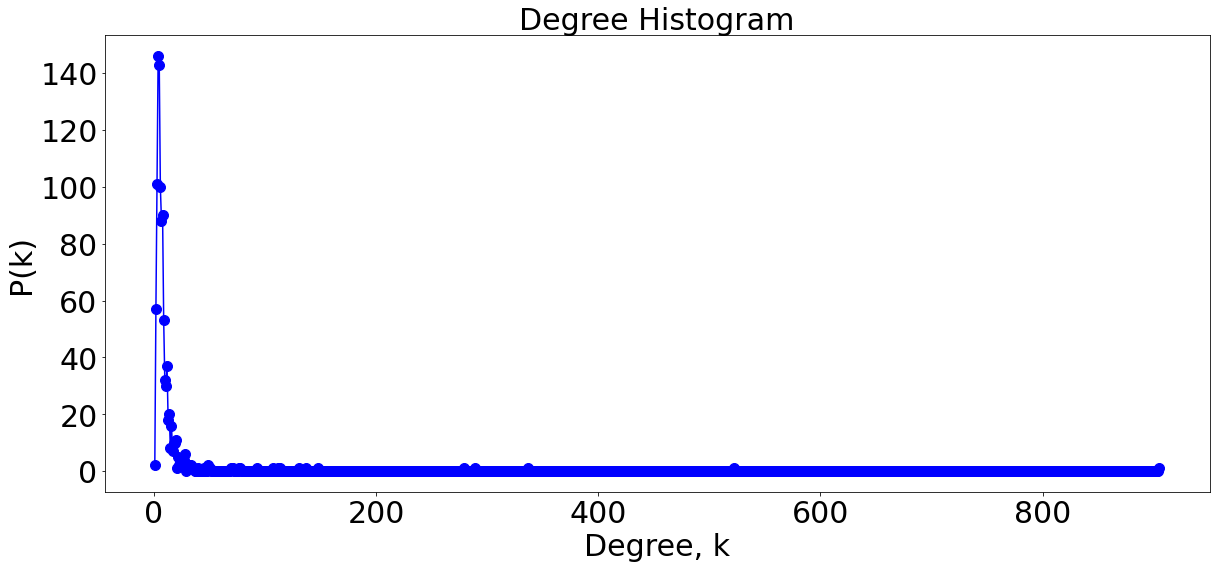

In [ ]:
plt.figure(figsize=(17,8)) #use once and set figure size
plt.plot(bins0[:-1],n0,'bo-', markersize=10, label="Empirical Data") 
plt.title('Degree Histogram',fontsize=30)
plt.xlabel('Degree, k',fontsize=30)
plt.ylabel('P(k)',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.savefig("./degree_histo.png")

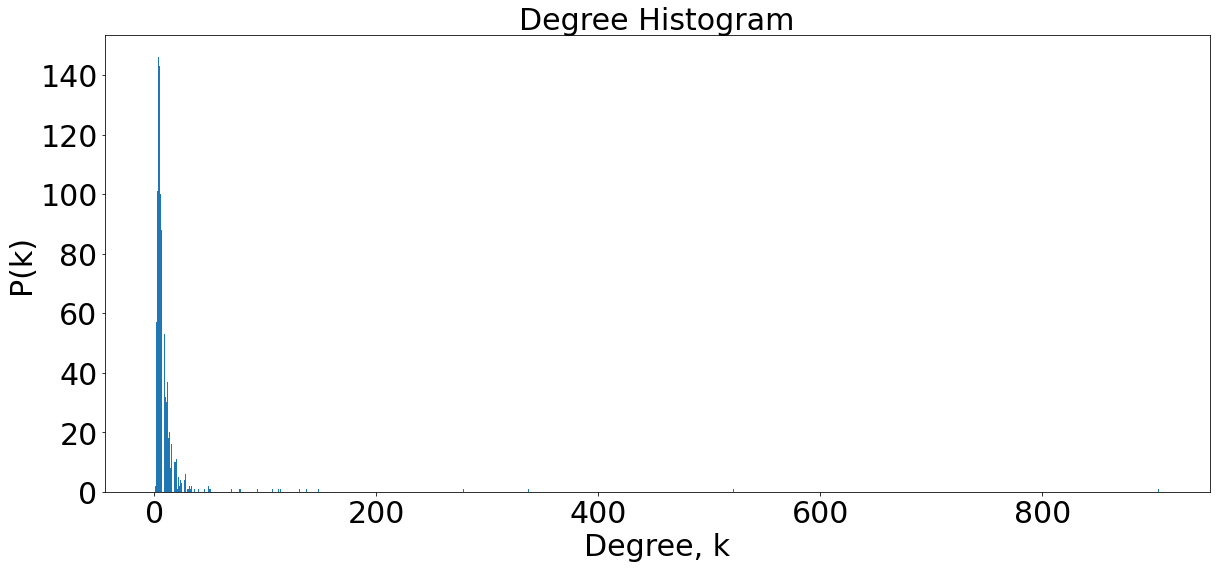

In [ ]:
plt.figure(figsize=(17,8)) #use once and set figure size
plt.bar(bins0[:-1],n0, label="Empirical Data") 
plt.title('Degree Histogram',fontsize=30)
plt.xlabel('Degree, k',fontsize=30)
plt.ylabel('P(k)',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.savefig("./degree_histo_bars.png")

# New Section
This is the start of the Homework assignment 1 part 1

For this assingment I chose to look at the powergrid network. 

1)

Describe what the nodes and the links represent (0.5 pt)
  The nodes are the power plant, transformer, or consumer. The links represent if two of these are connnected with a wire.



Should it be read as directed or undirected graph? (0.5 pt)
  I am going to say that it should be read as undirected. This is because power goes through these wires freely, direction does not come into play, especially if consumer may be connected to another consumer. Upon further investigation, a paper titled: "The Power Grid as a Complex Network: a survey" said that this Western State Power Grid is an undirected weighted graph. We however have no weights on our graph due to the lack of weights in the data set.

Thing to note is that this graph is not connected, should have checked this sooner. Now I will get the largest component and do what I have done before, but on the largest connected component.

In [58]:
from google.colab import files
files.upload_file("powergrid.edgelist.txt")

Saved powergrid.edgelist.txt to /content/powergrid.edgelist.txt


In [65]:
# Read the NODES csv file
fn=pd.read_csv("powergrid.edgelist.txt", delimiter = "\t",header=None)  ## Add the name of your file
#number of links
n_link=len(fn.index.array)

fn.head(10)

,0,1
0,0,386
1,0,395
2,0,451
3,1,3553
4,1,3586
5,1,3587
6,1,3637
7,2,3583
8,3,4930
9,4,88


In [116]:
#read nodes from network
G1 = nx.Graph()  
for n in range(n_link):
    G1.add_edge(fn[0].values[n],fn[1].values[n])


In [117]:
#We will now get the Greatest connected components
GreatesConnectedComp = sorted(nx.connected_components(G1), key=len, reverse = True)
np.shape(GreatesConnectedComp)

(1,)

It appears that it is all connnected(AKA that connected_components returns only one graph) so we will stick with using G1

In [118]:
degree_dict = {}
for node in G1.nodes:
  degree_dict[node] = G1.degree(node)

In [119]:
degs0 = degree_dict.values()
print(max(degs0))

19


2)

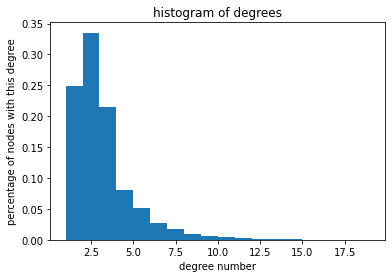

In [120]:
plt.hist(degs0, bins = range(min(degs0), max(degs0)+ 1, 1), density = True)
plt.title('histogram of degrees')
plt.xlabel('degree number')
plt.ylabel('percentage of nodes with this degree')
plt.show()

3)

In [121]:
#calculate the average clustering coeff of the graph
average_clustering_coeff = nx.average_clustering(G1)
print('the average clustering coeff is:', average_clustering_coeff)

the average clustering coeff is: 0.08010361108159712


4)

In [122]:
#calculate the average shoertest path within the graph
average_shortest_path = nx.average_shortest_path_length(G1)

In [124]:
print('the average shortest path in the network is:', average_shortest_path)

the average shortest path in the network is: 18.989185424445708


5,6)

In [105]:
clustering_coeffs_dict = nx.clustering(G1)

# function to return key for any value
def get_key(val, dict):
  keys = []
  for key, value in dict.items():
      if val == value:
          keys.append(key)
  return keys
max_coeff = max(clustering_coeffs_dict.values())
keys_with_max_coeff = get_key(max_coeff, clustering_coeffs_dict)


In [126]:
print('The max clustering coeff is:', max_coeff)
print('The corresponding keys/nodes with the highest coeff are:', keys_with_max_coeff)

The max clustering coeff is: 1.0
The corresponding keys/nodes with the highest coeff are: [30, 142, 167, 149, 152, 175, 110, 84, 366, 243, 371, 312, 289, 367, 368, 381, 369, 264, 281, 460, 489, 505, 580, 677, 877, 880, 890, 935, 977, 1196, 2135, 1322, 2184, 1483, 1805, 1558, 1775, 1857, 1918, 1856, 2043, 1617, 1700, 1673, 1898, 2088, 2149, 1868, 2232, 2295, 2403, 2333, 2331, 2289, 2341, 2377, 2299, 2300, 3094, 2719, 3043, 3228, 2525, 2716, 3244, 3279, 2478, 2958, 2989, 3214, 3252, 3113, 2514, 3036, 2520, 3181, 3112, 3179, 3055, 2920, 3207, 2809, 2845, 2995, 3096, 3141, 3149, 2972, 3097, 3205, 3277, 2720, 2911, 3095, 3158, 3199, 3215, 3157, 2652, 3178, 3077, 2684, 2969, 3104, 3200, 3221, 3026, 3143, 2678, 2714, 2758, 3050, 3098, 3099, 2891, 3145, 3180, 3171, 2696, 3133, 3134, 3190, 3270, 2745, 2706, 3263, 2811, 2757, 2756, 3061, 3265, 3042, 2774, 2968, 2784, 3267, 3150, 3211, 3222, 3253, 3238, 2903, 3079, 3116, 3198, 2866, 3131, 2865, 3250, 2935, 3018, 3213, 3038, 3126, 3130, 3275, 3028

7,8)

In [97]:
shortest_path_dict = nx.shortest_path(G1)

In [102]:
largest = 0
nodes = []
for source in G1.nodes:
  for target in G1.nodes:
    current_path_len = len(shortest_path_dict[source][target])
    if current_path_len > largest:
      nodes = shortest_path_dict[source][target]
      largest = current_path_len



In [127]:
print('the maximum shortest path is:', largest)
print('The largest path of nodes is:', nodes)

the maximum shortest path is: 47
The largest path of nodes is: [3496, 3493, 3499, 3497, 3525, 3637, 1, 3586, 3329, 3365, 3352, 3362, 4476, 4474, 4652, 2249, 2370, 2317, 2231, 396, 420, 426, 427, 1125, 1476, 1308, 1243, 1267, 1244, 1167, 1148, 1340, 1178, 285, 316, 337, 253, 4362, 4363, 4352, 4381, 4332, 4340, 4333, 4359, 4351, 4350]
